# Lorenz Equations
    Taylor Rubalcava

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from scipy.stats import linregress

Writing a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8/3$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy.integrate.solve_ivp` to compute the solution.

In [7]:
def lorenz(t, x):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        t (float): The time value t
        x ((3,) ndarray): The state values (x,y,z)
    Returns:
        ((3,) ndarray): The derivative values
    """
    σ = 10
    ρ = 28
    β = 8/3
    dxdt = σ*(x[1] - x[0])
    dydt = x[0]*(ρ - x[2]) - x[1]
    dzdt = x[0]*x[1] - β*x[2]
    return np.array([dxdt, dydt, dzdt])

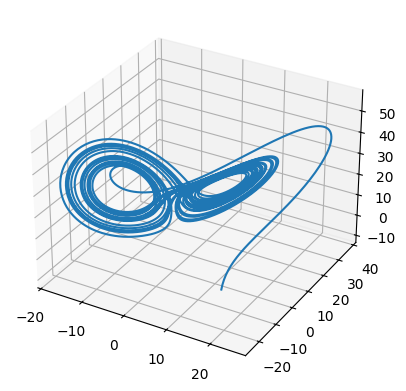

In [8]:
# Making a 3D Plot of a solution to the Lorenz equations
# Drawing the initial condition from a uniform distribution on [-15,15]
# and t in the range [0,25]
x0 = np.random.uniform(-15,15,3)

sol = solve_ivp(lorenz, (0, 25), x0, t_eval=np.linspace(0, 25, 10000))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])
plt.show()

To better visualize the Lorenz attractor, I'll produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

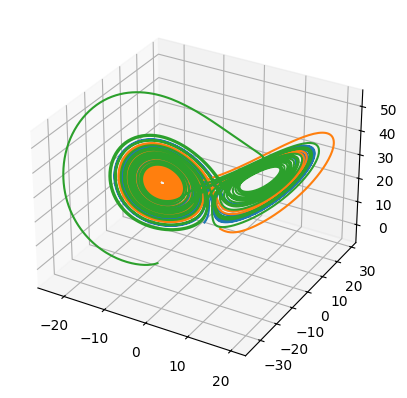

In [9]:
# Creating a single 3D Plot displaying the solutions for 3 different initial conditions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x0 = np.random.uniform(-15,15,3)
sol = solve_ivp(lorenz, (0, 25), x0, t_eval=np.linspace(0, 25, 10000))
ax.plot(sol.y[0], sol.y[1], sol.y[2])
x0 = np.random.uniform(-15,15,3)
sol = solve_ivp(lorenz, (0, 25), x0, t_eval=np.linspace(0, 25, 10000))
ax.plot(sol.y[0], sol.y[1], sol.y[2])
x0 = np.random.uniform(-15,15,3)
sol = solve_ivp(lorenz, (0, 25), x0, t_eval=np.linspace(0, 25, 10000))
ax.plot(sol.y[0], sol.y[1], sol.y[2])
plt.show()

Using `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-8)`

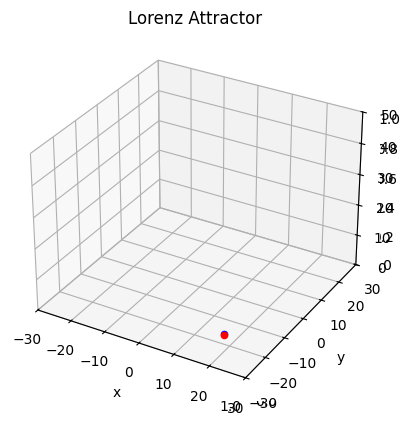

In [10]:
# Creating a single 3D Plot displaying the solutions for 2 different initial conditions
# that are nearly identical
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x0 = np.random.uniform(-15,15,3)
sol0 = solve_ivp(lorenz, (0, 50), x0, t_eval=np.linspace(0, 50, 3000))
x1 = x0 + np.random.randn(3)*1e-1
sol1 = solve_ivp(lorenz, (0, 50), x1, t_eval=np.linspace(0, 50, 3000))

# Creating the 3D axis object
ax = fig.add_subplot(111, projection = "3d")

def update(t):
    ax.clear()
    # Setting the axis limits
    ax.set_xlim3d([-30,30])
    ax.set_ylim3d([-30,30])
    ax.set_zlim3d([0,50])

    ax.plot(sol0.y[0,:t], sol0.y[1,:t], sol0.y[2,:t], color = "blue")
    ax.plot(sol1.y[0,:t], sol1.y[1,:t], sol1.y[2,:t], color = "red")

    # Adding a point marker to the final point of the solution
    ax.scatter(sol0.y[0,t], sol0.y[1,t], sol0.y[2,t], color = "blue")
    ax.scatter(sol1.y[0,t], sol1.y[1,t], sol1.y[2,t], color = "red")

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title("Lorenz Attractor")

ten_seconds = 1000*10
ani = FuncAnimation(fig, update, frames=range(3000), interval = ten_seconds / 3000)
animation.writer = animation.writers["ffmpeg"]

# Saving the animation
ani.save("./Data/lorenz_animation1.mp4")

<video src="./Data/lorenz_animation1.mp4" controls>

The `solve_ivp` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the `solve_ivp` arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.

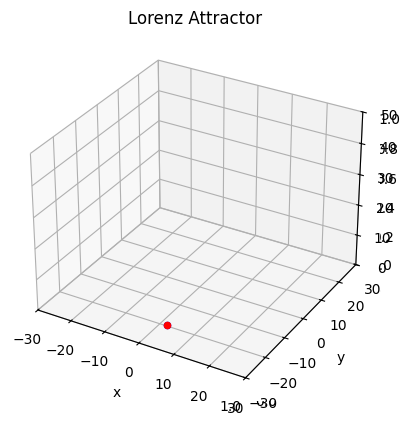

In [11]:
# Creating a single 3D Plot displaying the solutions for 2 different initial conditions
# that are nearly identical
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x0 = np.random.uniform(-15,15,3)
sol0 = solve_ivp(lorenz, (0, 50), x0, t_eval=np.linspace(0, 50, 3000), atol=1e-15, rtol=1e-13)
x1 = x0
sol1 = solve_ivp(lorenz, (0, 50), x1, t_eval=np.linspace(0, 50, 3000), atol=1e-12, rtol=1e-10)

# Creating the 3D axis object
ax = fig.add_subplot(111, projection = "3d")

def update(t):
    ax.clear()
    # Setting the axis limits
    ax.set_xlim3d([-30,30])
    ax.set_ylim3d([-30,30])
    ax.set_zlim3d([0,50])

    ax.plot(sol0.y[0,:t], sol0.y[1,:t], sol0.y[2,:t], color = "blue")
    ax.plot(sol1.y[0,:t], sol1.y[1,:t], sol1.y[2,:t], color = "red")

    # Adding a point marker to the final point of the solution
    ax.scatter(sol0.y[0,t], sol0.y[1,t], sol0.y[2,t], color = "blue")
    ax.scatter(sol1.y[0,t], sol1.y[1,t], sol1.y[2,t], color = "red")

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title("Lorenz Attractor")


ten_seconds = 1000*10
ani = FuncAnimation(fig, update, frames=range(3000), interval = ten_seconds / 3000)
animation.writer = animation.writers["ffmpeg"]

# Saving the animation
ani.save("./Data/lorenz_animation2.mp4")

<video src="./Data/lorenz_animation2.mp4" controls>

Estimating the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `solve_ivp` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

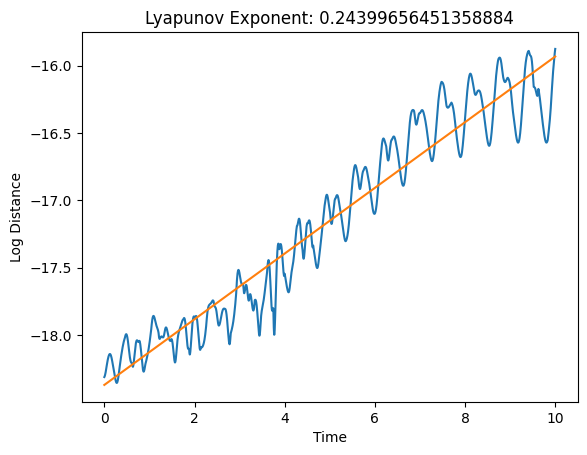

In [12]:
# Estimating the Lyapunov exponent
# Setting the initial condition
x0 = np.random.uniform(-15,15,3)

# Solving the Lorenz equations for the initial condition
sol = solve_ivp(lorenz, (0, 10), x0, t_eval=np.linspace(0, 10, 3000))

# Getting the last value of the solution to estimate the attractor
attractor_estimate = sol.y[:,-1]

# Setting the attractor estimate as the new initial condition
x0 = attractor_estimate
x1 = x0 + np.random.randn(3)*1e-8

# Solving the Lorenz equations for the new initial conditions
sol0 = solve_ivp(lorenz, (0, 10), x0, t_eval=np.linspace(0, 10, 3000))
sol1 = solve_ivp(lorenz, (0, 10), x1, t_eval=np.linspace(0, 10, 3000))

# Calculating the distance between the two solutions for each time step
distance = np.linalg.norm(sol0.y - sol1.y, axis=0)

# Fitting a linear regression to the log of the distance
slope, intercept, _, _, _ = linregress(sol0.t, np.log(distance))

# Plotting the distance between the two solutions and the linear regression
plt.plot(sol0.t, np.log(distance))
plt.plot(sol0.t, slope*sol0.t + intercept)

plt.xlabel("Time")
plt.ylabel("Log Distance")
plt.title(f"Lyapunov Exponent: {slope}")
plt.show()
